# LFW Dataset EDA

In order to perform effective data preprocessing and model training, a further understanding of the LFW dataset will have to be attained. This could be simple things like checking the amount of images, the number of unique people, amount of similar images etc.

This issue and notebook will not go into the details of how the network gets to the point to compare the images as that will be covered in a future issue, possibly the one where the model is written(?).



## 1. Imports

In [85]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

## 2. Organising Images into Pandas DF for Analysis

The LFW dataset is conveniently organised in folders, each named with the name of the person whose image resides in the folder. Some of these folders contain multiple images, which we can use to form positive pairs, while some only contain single images, which we'll definitely have to use as negatives.

Let's organise the images into a pandas dataframe for easier analysis for further steps.

In [86]:
data_dir = '../data/lfw-deepfunneled/lfw-deepfunneled'

data = []

for person in os.listdir(data_dir):
    person_dir = os.path.join(data_dir, person)
    if os.path.isdir(person_dir):
        for image in os.listdir(person_dir):
            data.append((os.path.join(person_dir, image), person))
            
df = pd.DataFrame(data, columns=['image_path', 'person'])

In [87]:
df.head()

,image_path,person
0,../data/lfw-deepfunneled/lfw-deepfunneled/Alic...,Alice_Fisher
1,../data/lfw-deepfunneled/lfw-deepfunneled/Alic...,Alice_Fisher
2,../data/lfw-deepfunneled/lfw-deepfunneled/Elle...,Ellen_Barkin
3,../data/lfw-deepfunneled/lfw-deepfunneled/Quee...,Queen_Latifah
4,../data/lfw-deepfunneled/lfw-deepfunneled/Quee...,Queen_Latifah


Now that we have a dataframe of the images along with the person the images are of, we essentially have all the information we need to perform basic analysis.

## 3. Basic Analysis

#### a. Checking the total number of images and number of people we have in the dataset

In [88]:
print(f'Total number of images in dataset: {len(df)}, number of unique persons: {df.person.nunique()}')

Total number of images in dataset: 13233, number of unique persons: 5749


#### b. Checking the total number of images of a same person, and how many people have more than one image

In [89]:
for person in df['person'].unique():
    person_images = df[df['person'] == person]
    if len(person_images) > 1:
        df.loc[df['person'] == person, 'multiple_images'] = True
    else:
        df.loc[df['person'] == person, 'multiple_images'] = False
        

In [90]:
df.head()

,image_path,person,multiple_images
0,../data/lfw-deepfunneled/lfw-deepfunneled/Alic...,Alice_Fisher,True
1,../data/lfw-deepfunneled/lfw-deepfunneled/Alic...,Alice_Fisher,True
2,../data/lfw-deepfunneled/lfw-deepfunneled/Elle...,Ellen_Barkin,False
3,../data/lfw-deepfunneled/lfw-deepfunneled/Quee...,Queen_Latifah,True
4,../data/lfw-deepfunneled/lfw-deepfunneled/Quee...,Queen_Latifah,True


In [91]:
print(f'Number of images that are of a same individual: {len(df[df.multiple_images == True])}')
print(f'Number of people with multiple images: {df[df.multiple_images == True].person.nunique()}')

Number of images that are of a same individual: 9164
Number of people with multiple images: 1680


#### c. Range of Number of Multiple Images Per Person

In [92]:
multiple_df = df[df.multiple_images == True]
multiple_df['person'].value_counts().head()

person
George_W_Bush        530
Colin_Powell         236
Tony_Blair           144
Donald_Rumsfeld      121
Gerhard_Schroeder    109
Name: count, dtype: int64

Wow, that's a lot of photos of George W Bush. How about the lower end?

In [93]:
multiple_df['person'].value_counts().tail(700)

person
Edie_Falco              2
Maria_Luisa_Mendonca    2
Alan_Mulally            2
Claire_Hentzen          2
Kurt_Russell            2
                       ..
Richard_Branson         2
Fran_Drescher           2
Mikhail_Gorbachev       2
S_Jayakumar             2
James_Ivory             2
Name: count, Length: 700, dtype: int64

We have a lot of people with only 2 images, so naturally the dataset is imbalanced in this way. Though this might not be the worst thing. More insights below.

## 4. Quick Visualisations

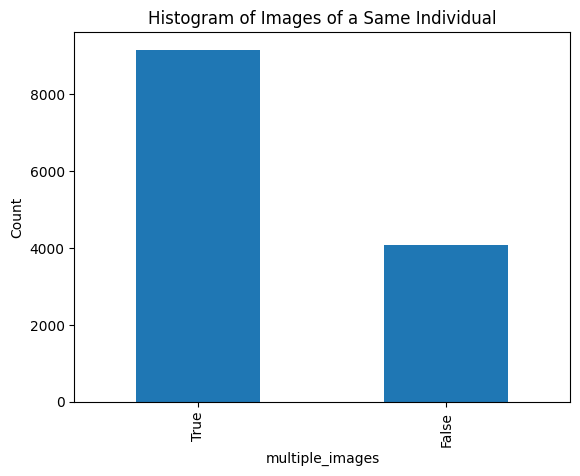

In [94]:
df['multiple_images'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Histogram of Images of a Same Individual')
plt.show()

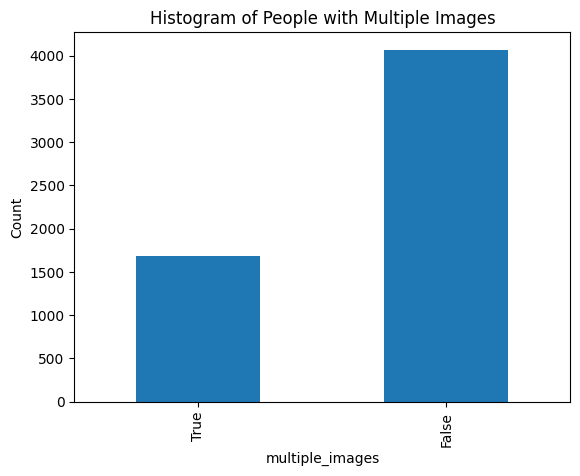

In [95]:
check_multi = df.drop_duplicates(subset='person', keep='first')
value_counts = check_multi['multiple_images'].value_counts()
value_counts = value_counts.reindex([True, False])
value_counts.plot(kind='bar')
plt.ylabel('Count')
plt.title('Histogram of People with Multiple Images')
plt.show()

# Conclusion
As mentioned before, we do have an imbalanced dataset in terms of number of people with multiple images, and also the number of images that are of a same individual against those of only one person. 

However, since our model is going to be trained on similar / dissimilar pairs, maybe we can write our data processing to take pairs in such a way that we can balance our dataset. For example, we can make many permuations of dissimilar pairs easily, increasing the number of dissimilar pairs that way.